<h2>Installation et importation du dataset

In [14]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [15]:
df=pd.read_csv('D:/Projets_LSTM_ARIMA_PROPHET/AirPassengers.csv')

In [16]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<h2>Analyser les types de données

In [17]:
df.dtypes

Month         object
Passengers     int64
dtype: object

<h2>Tracer pour obtenir des informations

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


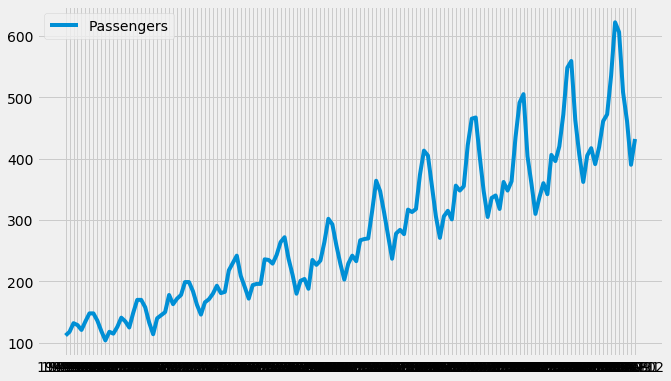

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Month'))
plt.legend(['Passengers'])

<h2>Conversion de la colonne Passengers en sa valeur log

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


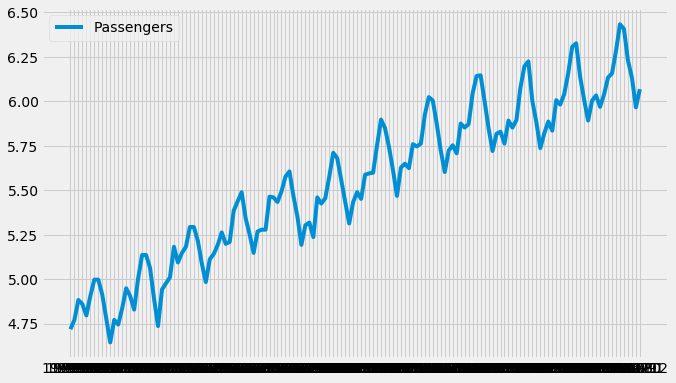

In [19]:
df['Passengers'] = np.log(df['Passengers'])
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Month'))
plt.legend(['Passengers'])

<h2>Rendre l'ensemble de données «Prophet» conforme

In [20]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791


<h2>Faire des prédictions

In [21]:
#Prophet suit l'API de modèle sklearn dans laquelle une instance de la classe Prophet est créée, 
#puis les méthodes d'ajustement (fit) et de prédiction sont appelées. 
#Le modèle est instancié par un nouvel objet Prophet et suivi en appelant sa méthode 
#d'ajustement et en passant dans la trame de données historique.

In [22]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [23]:
#Prophet ajustera par défaut les saisonnalités hebdomadaires et annuelles si la série chronologique 
#est supérieure à deux cycles. Il s'adaptera également à la saisonnalité quotidienne d'une série chronologique sous-quotidienne.

In [24]:
future1 = m1.make_future_dataframe(periods=60)
forecast1 = m1.predict(future1)
forecast1.tail().T

,199,200,201,202,203
ds,1961-01-26 00:00:00,1961-01-27 00:00:00,1961-01-28 00:00:00,1961-01-29 00:00:00,1961-01-30 00:00:00
trend,6.14338,6.14367,6.14397,6.14427,6.14456
yhat_lower,5.99062,6.00219,6.01476,6.03199,6.04265
yhat_upper,6.08012,6.09256,6.10566,6.11765,6.13302
trend_lower,6.14316,6.14345,6.14371,6.144,6.14428
trend_upper,6.1438,6.14414,6.14448,6.14483,6.14518
additive_terms,-0.105937,-0.0947492,-0.0825596,-0.0694191,-0.0553836
additive_terms_lower,-0.105937,-0.0947492,-0.0825596,-0.0694191,-0.0553836
additive_terms_upper,-0.105937,-0.0947492,-0.0825596,-0.0694191,-0.0553836
daily,0.075564,0.075564,0.075564,0.075564,0.075564


In [25]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
199,1961-01-26,6.037438,5.990619,6.080116
200,1961-01-27,6.048923,6.002194,6.092560
201,1961-01-28,6.061410,6.014762,6.105662
202,1961-01-29,6.074848,6.031992,6.117653
203,1961-01-30,6.089181,6.042651,6.133025


In [26]:
#Depuis que j'ai pris le log des Passengers, je vais les reconvertir aux valeurs d'origine

In [27]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
199,418.818644,399.661880,437.080100
200,423.656704,404.314949,442.553105
201,428.980072,409.428486,448.389332
202,434.783572,416.544069,453.798336
203,441.060170,421.007792,460.827906


In [28]:
#Tracer les prévisions

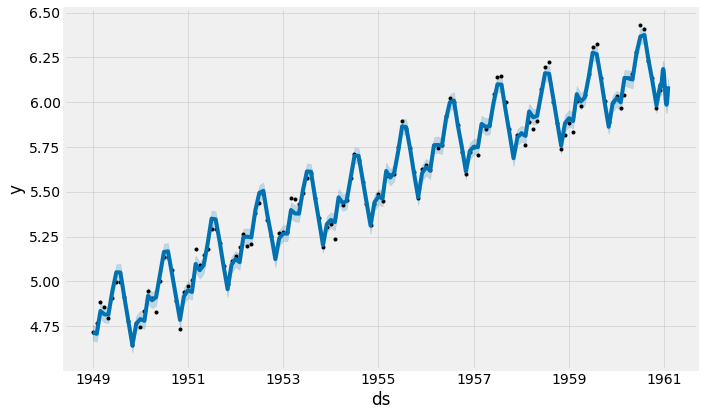

In [29]:
m1.plot(forecast1);

In [30]:
#Tracer les composants de prévision

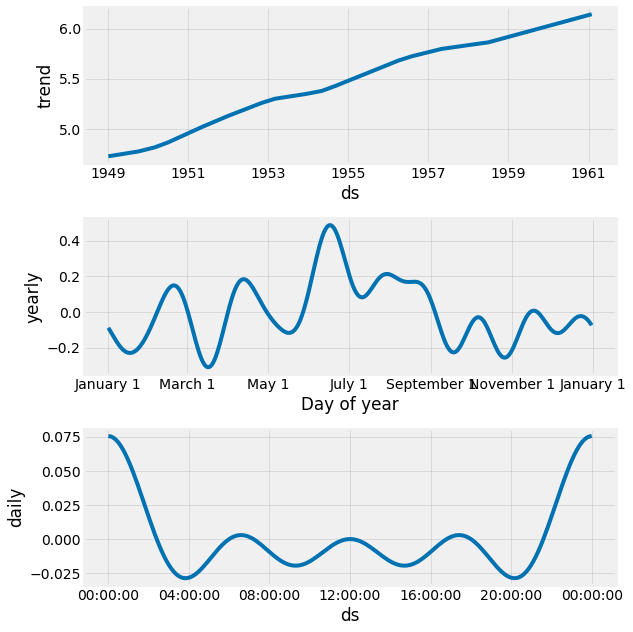

In [31]:
m1.plot_components(forecast1);